In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [10]:
#Parameters are extracted from NVIDIA daily stock prices
S = 487.16
alpha = 0.000476237
sigma = 0.03848375542
T = 252
n = 252
dt = T / n
r = 0.042 / 252

#m number of simulations
m = 10

In [11]:
def stock_price(S, alpha, sigma, T, n, dt):
    St_values = np.zeros((n + 1, m))
    Zt_values = np.zeros((n + 1, m))

    for j in range(m):
        t = np.linspace(0, T, n + 1)
        St = np.zeros(n + 1)
        St[0] = S
        Zt = np.zeros(n + 1)
        Zt[0] = 1
        e = np.random.normal(0, 1, n + 1)

        for i in range(1, n + 1):
            St[i] = St[i - 1] * np.exp((alpha - 0.5 * (sigma ** 2)) * dt + sigma * e[i - 1] * np.sqrt(dt))
            Zt[i] = Zt[i-1]*np.exp(-((alpha - r) / sigma) * e[i - 1] * np.sqrt(dt) - 0.5 * (((alpha - r) / sigma) ** 2) * dt)

        St_values[:, j] = St
        Zt_values[:, j] = Zt

    return St_values, Zt_values


St_values, Zt_values = stock_price(S, alpha, sigma, T, n, dt)

In [12]:
columns = [f"Path_{i+1}" for i in range(m)]
index = [f"{i}" for i in range(n + 1)]

df_St = pd.DataFrame(St_values, columns=columns, index=index)
df_Zt = pd.DataFrame(Zt_values, columns=columns, index=index)

We can model stock prices over time under a stochastic measure with Geometric Brownian Motion

In [13]:
df_St

,Path_1,Path_2,Path_3,Path_4,Path_5,Path_6,Path_7,Path_8,Path_9,Path_10
0,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000,487.160000
1,473.051180,483.968221,483.559584,510.673481,489.820985,507.210780,481.836839,492.846224,490.939275,478.657064
2,518.561856,475.327593,480.114062,501.253574,505.501973,501.406893,484.867106,511.408402,469.635350,456.699127
3,511.525257,483.963252,472.405968,490.989588,525.269509,549.400962,489.078710,501.165650,500.802553,445.846681
4,488.845631,472.149624,469.663398,476.429577,552.493871,559.422049,497.951580,525.140328,532.521095,451.198118
...,...,...,...,...,...,...,...,...,...,...
248,539.103411,350.363046,137.463156,300.217227,1386.531293,177.059976,793.687682,582.771076,1385.687994,219.093866
249,531.342220,346.753420,145.078754,298.152070,1361.618423,173.721564,817.515163,544.055648,1402.925710,208.065902
250,538.448832,357.179928,142.899310,292.506747,1374.750177,174.108956,839.146720,573.434587,1326.487039,214.213134
251,554.375224,351.874061,133.607296,286.901320,1306.469393,172.865515,873.839293,589.754416,1329.868713,214.044790


Under a Geometric Brownian Motion, there exist a value of Z which could be used to transform market risk into risk neutral, which commonly used to value derivatives

In [14]:
df_Zt

,Path_1,Path_2,Path_3,Path_4,Path_5,Path_6,Path_7,Path_8,Path_9,Path_10
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006074,1.001287,1.001464,0.990109,0.998775,0.991518,1.002211,0.997490,0.998299,1.003599
2,0.986855,1.004977,1.002874,0.993882,0.992130,0.993819,1.000811,0.989724,1.007511,1.013410
3,0.989590,1.001114,1.006185,0.998102,0.984121,0.974924,0.998916,0.993832,0.993982,1.018429
4,0.998928,1.006211,1.007322,1.004315,0.973696,0.971163,0.995082,0.984085,0.981219,1.015803
...,...,...,...,...,...,...,...,...,...,...
248,0.958007,1.048308,1.274746,1.082707,0.786345,1.209050,0.883602,0.942536,0.786445,1.156398
249,0.960831,1.050488,1.260349,1.084176,0.789262,1.213764,0.878078,0.956093,0.784347,1.168847
250,0.958082,1.043911,1.264232,1.088421,0.787611,1.213093,0.873221,0.945558,0.793517,1.161653
251,0.952179,1.047090,1.282013,1.092736,0.795973,1.214805,0.865782,0.939945,0.793025,1.161742


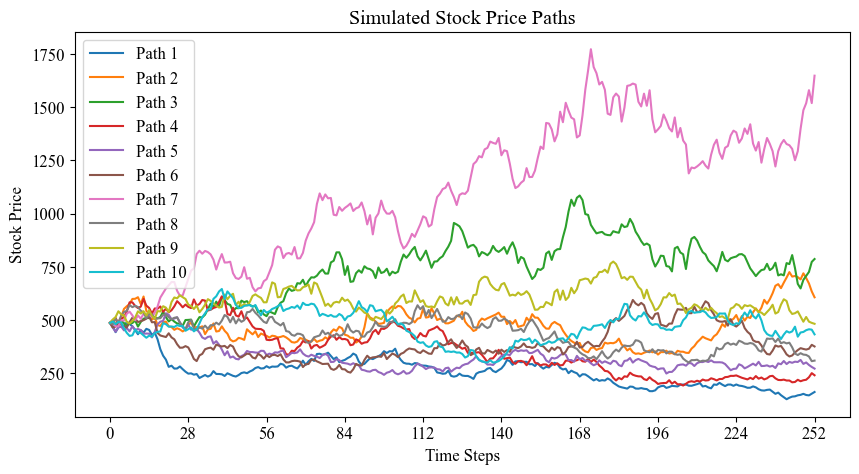

In [7]:
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 12

# Plot stock price paths without grid
plt.figure(figsize=(10, 5))
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
for i in range(m):
    plt.plot(df_St.index, df_St.iloc[:, i], label=f'Path {i+1}')

# Set x-axis ticks to display only 10 values
n_ticks = 10
indices = np.linspace(0, n, n_ticks, dtype=int)
plt.xticks(df_St.index[indices])

plt.legend(loc='upper left')
plt.grid(False)  # Remove grid
plt.show()